# Number of Arrests per Neighborhood

For our final project, our overall metric is the safest neighborhood in Pittsburgh. We believe this is an important metric for anyone in the Pittsburgh area considering where they might want to live or rent. To measure this, I am using the sub-metric of the number of arrests per neighborhood from this WPRDC dataset: https://data.wprdc.org/dataset/arrest-data

In [1]:
# import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read in dataset and parse dates as DateTime objects
arrests = pd.read_csv("police_arrest_data.csv", parse_dates=["ARRESTTIME"])
arrests.sort_values(by="ARRESTTIME").tail(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
61218,2056347,22164633,60.0,M,B,2023-03-21 20:20:00,"900 Block 2nd AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"5th AV & Stevenson ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.986466,40.438615
61221,2056350,23007239,60.0,M,B,2023-03-21 20:20:00,"900 Block 2nd AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"500 Block Larimer AV Pittsburgh, PA 15206",Larimer,5,1204.0,9.0,2.0,-79.914484,40.465299
61208,2056326,16218676,33.0,M,B,2023-03-22 11:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault.,"2800 Block Webster AV Pittsburgh, PA 15219",Middle Hill,2,501.0,6.0,3.0,-79.968734,40.451071
61223,2056352,23010185,38.0,M,B,2023-03-22 11:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",3502 Burglary. / 3503(a) Criminal Trespass,"4000 Block Howley ST Pittsburgh, PA 15224",Bloomfield,5,903.0,NaN,NaN,NaN,NaN
61261,2056419,23031167,31.0,M,B,2023-03-22 13:37:00,Zone OSC,2501 Criminal Homicide. / 3701 Robbery. / 6105...,Zone 3,NaN,3,NaN,NaN,NaN,NaN,NaN


Houston, we have a problem; many of the observations have NaN for the incident neighborhood!

In [3]:
# drop observations that have null values in the INCIDENTNEIGHBORHOOD column
arrests = arrests.dropna(subset=['INCIDENTNEIGHBORHOOD'])
arrests.sort_values(by="ARRESTTIME").head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
45592,2033518,98246337,27.0,M,W,1998-10-13 12:45:00,"600 Block 1ST AV PITTSBURGH, PA 15219",9014 Out of State Arrest / 9015 Failure To App...,"600 Block 1ST AV PITTSBURGH, PA 15219",Central Business District,2,201.0,6.0,6.0,-79.996041,40.435040
9503,1986575,7034314,21.0,F,B,2007-02-21 13:30:00,"100 Block Rhine PL Pittsburgh, PA 15212",2701 Simple Assault.,"100 Block RHINE PL PITTSBURGH, PA 15212",Spring Hill-City View,1,2620.0,1.0,1.0,-79.994099,40.466786
33496,2017230,7074657,18.0,M,B,2007-04-19 17:22:00,"Corliss ST Pittsburgh, PA",3925 Receiving Stolen Property. / 4524 Windshi...,"30 Block CLEARFIELD AV PITTSBURGH, PA",Westwood,3,2811.0,NaN,NaN,NaN,NaN
10288,1987517,7102272,40.0,M,B,2007-05-22 16:42:00,"Tioga ST & Rosedale ST Pittsburgh, PA 15208",13(a)(16) Possession of Controlled Substance /...,"TIOGA ST & ROSEDALE ST PITTSBURGH, PA 15208",Homewood South,5,1303.0,9.0,2.0,-79.886833,40.450037
7665,1984153,8234583,14.0,F,B,2008-10-04 12:25:00,"200 Block Greenfield AV Pittsburgh, PA 15207",2701 Simple Assault.,"200 Block GREENFIELD AV PITTSBURGH, PA",Greenfield,4,1516.0,5.0,3.0,-79.949808,40.425719


Somewhat better! However, we still have data going as far back as 1998, for a total of `len(arrests)` == 58968 observations...

In [6]:
# filter arrests data to dates consistent with Connie's dataframe
start_date = pd.to_datetime('2023-03-08')
end_date = pd.to_datetime('2023-04-07')

filtered_arrests = arrests[(arrests['ARRESTTIME'] >= start_date) & (arrests['ARRESTTIME'] <= end_date)]
filtered_arrests.sort_values(by="ARRESTTIME").head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
61019,2056080,22188526,30.0,F,W,2023-03-08 08:30:00,"900 Block Second AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"Middle ST & Foreland ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.999393,40.454577
61006,2056067,22044811,23.0,M,B,2023-03-08 13:15:00,"600 Block 1st AV Pittsburgh, PA 15219",903 Criminal Conspiracy. / 2702 Aggravated Ass...,"7700 Block Susquehanna ST Pittsburgh, PA 15221",Homewood South,5,1304.0,9.0,2.0,-79.890638,40.450451
61190,2056298,23026255,45.0,F,W,2023-03-08 15:15:00,"900 Block Second AV Pittsburgh, PA 15219",3925 Receiving Stolen Property. / 3921(a) Thef...,"2300 Block Mission ST Pittsburgh, PA 15203",South Side Slopes,3,1608.0,3.0,3.0,-79.973741,40.423023
61164,2056266,23023864,45.0,M,W,2023-03-08 15:15:00,"900 Block Second AV Pittsburgh, PA 15219",3925 Receiving Stolen Property. / 3921(a) Thef...,"1900 Block Sidney ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.979009,40.429591
61014,2056075,22130699,60.0,M,B,2023-03-08 18:00:00,"900 Block Second AV Pittsburgh, PA 15219",2702 Aggravated Assault.,"6600 Block Frankstown AV Pittsburgh, PA 15206",Larimer,5,1208.0,9.0,2.0,-79.910873,40.459440


After filtering the dataframe to only contain observations from the same 30 days as my partner's dataframe has observations from, we are left with only `len(filtered_arrests)` == 71 arrests!

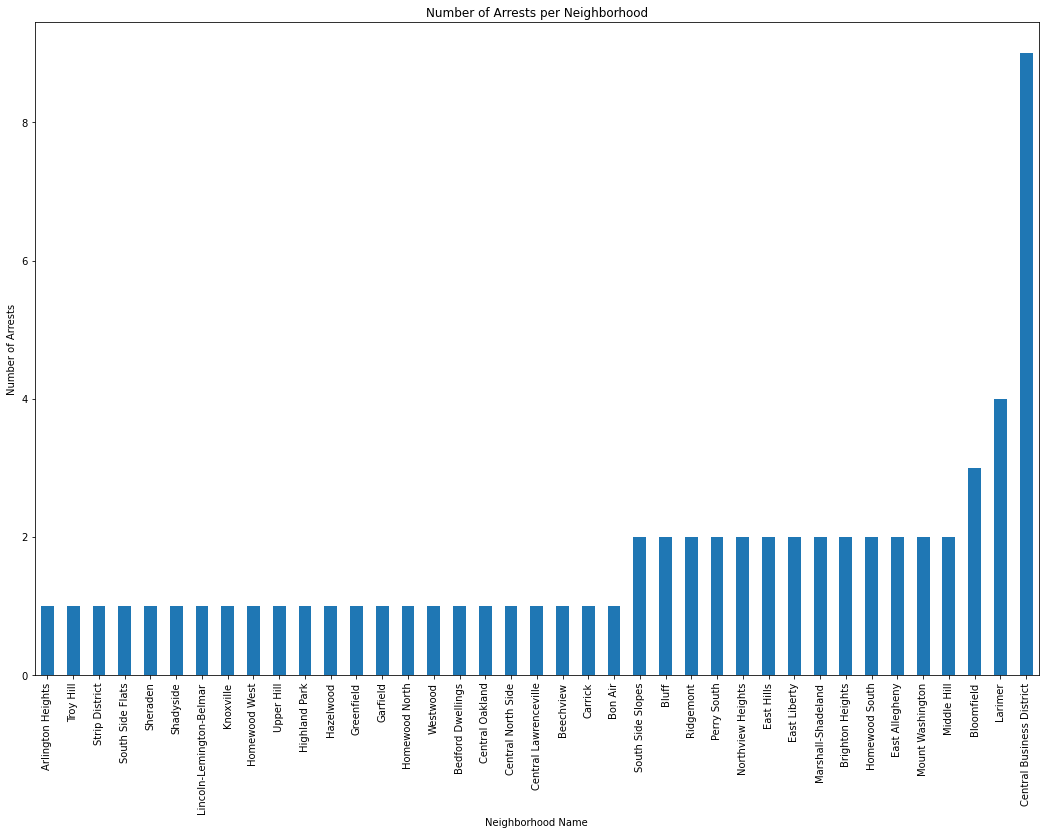

In [7]:
# get number of offenses per neighborhood
offenses_per_neighborhood = filtered_arrests.groupby("INCIDENTNEIGHBORHOOD").count().loc[:, "OFFENSES"]

# sort neighborhoods by number of offenses in ascending order
sorted_offenses_per_neighborhood = offenses_per_neighborhood.sort_values()

# create a bar plot
ax = sorted_offenses_per_neighborhood.plot.bar(figsize=(18,12))

# add titles and labels
ax.set_title('Number of Arrests per Neighborhood')
ax.set_xlabel('Neighborhood Name')
ax.set_ylabel('Number of Arrests')

# angle neighborhood labels
plt.xticks(rotation=90)

# show the plot
plt.show()

# Conclusion

Uh oh; it looks like there are many residential neighborhoods that are tied with only having 1 or 2 arrests during this timeframe! It looks like we will need to augment our data with something more nuanced...

<AxesSubplot:>

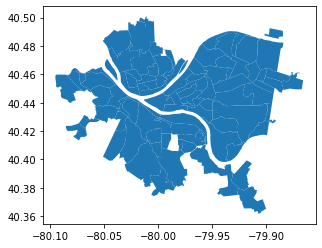

In [23]:
# create a geopandas map
import geopandas

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()

In [36]:
num_arrests = filtered_arrests.groupby("INCIDENTNEIGHBORHOOD").count()["OFFENSES"]
#num_arrests

# do the merge
arrests_map = neighborhoods.merge(num_arrests, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# look at the head to confirm it merged correctly
arrests_map[['hood', "OFFENSES", 'geometry']].head()

,hood,OFFENSES,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<AxesSubplot:>

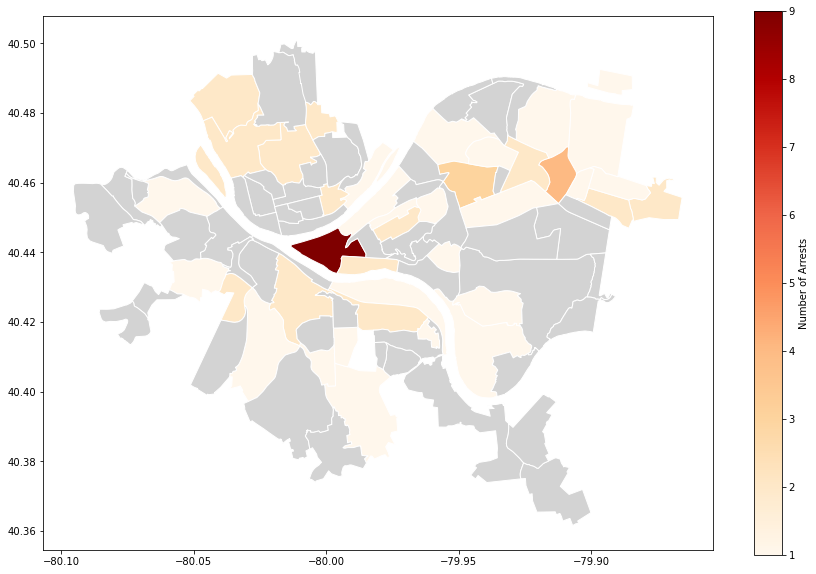

In [38]:
arrests_map.plot(column='OFFENSES', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )